In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [5]:
# Convert date to datetime
#df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')


# Define the start and end dates
start_date = '1998-01-01'
end_date = '2022-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_1998_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
#df_uk_2008_2012.dtypes
df_uk_1998_2022.head()

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert


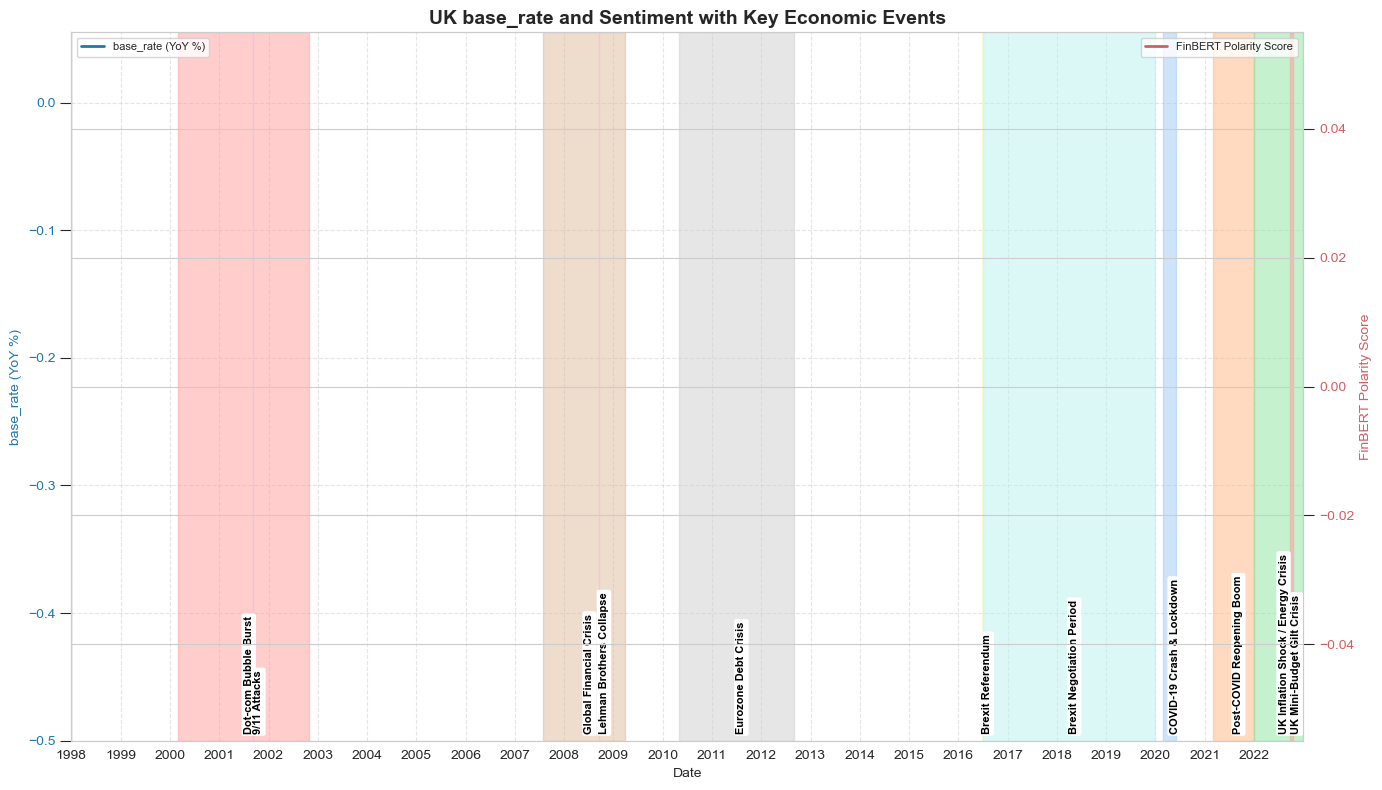

In [15]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('1998-01-01')
end_date = pd.to_datetime('2022-12-31')
df_plot = df_uk_1998_2022[
    (df_uk_1998_2022['Date'] >= start_date) & (df_uk_1998_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### This chart suggests a strong relationship between economic shocks, sentiment trends, and central bank policy actions. FinBERT sentiment appears to be a useful early indicator of turning points or stress in the economic cycle.

### Visual analysis shows that BoE base rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

ValueError: Axis limits cannot be NaN or Inf

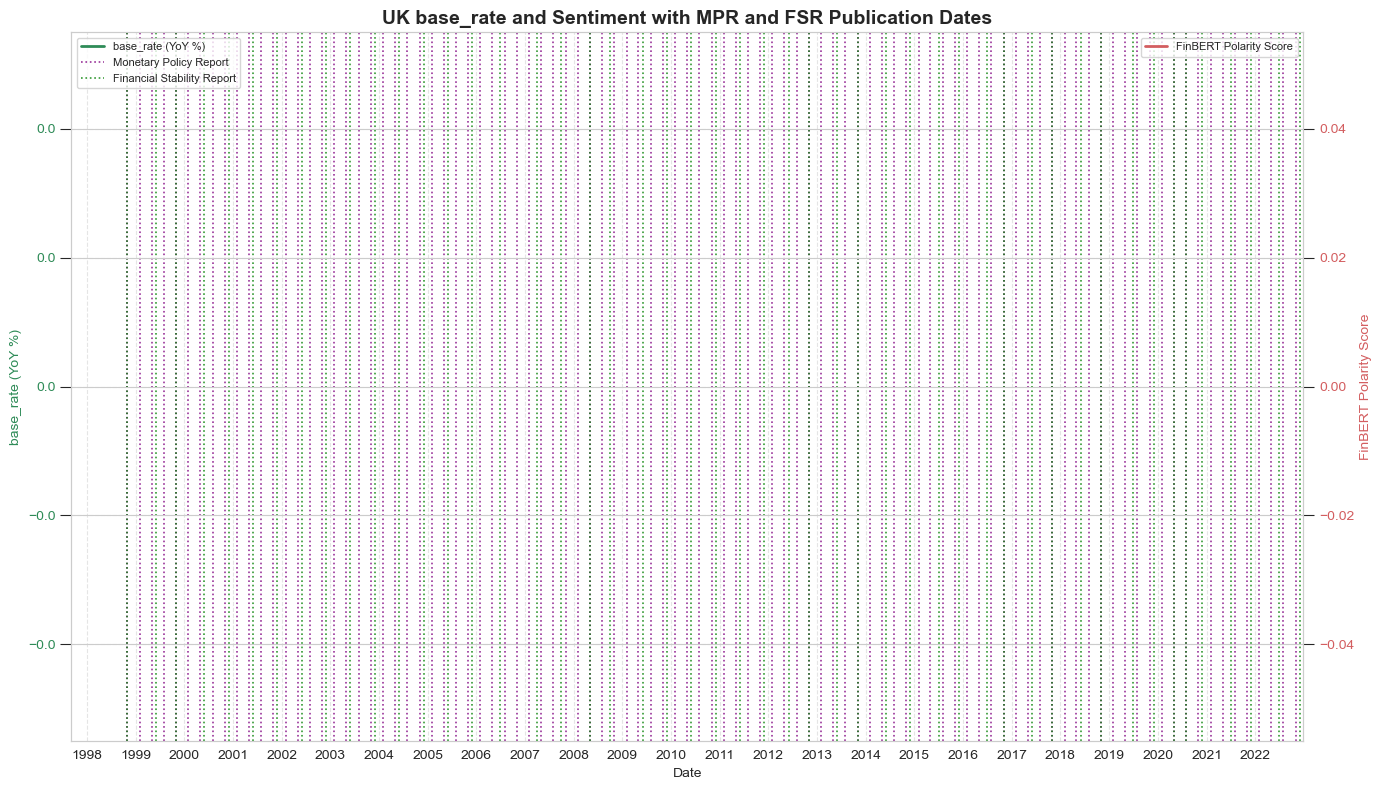

In [9]:

start_date = pd.to_datetime('1998-01-01')
df_plot2 = df_uk_1998_2022[df_uk_1998_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# base_rate Line (Left Axis)
color_base_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

### Summary
### Interpretation:

* Rate-Sentiment Dynamics:
FinBERT sentiment could serve as a leading indicator for rate changes.

Prolonged negative sentiment appears to correlate with loose monetary policy.

* Communication Strategy:

MPR and FSR publication timing may reflect the BoE’s response strategy to market signals or crises.

* Potential Use Cases:

Modeling policy response using sentiment and timing of reports.

Forecasting interest rates based on real-time sentiment signals.

### Drop unncessary columns to reduce the number of variables to be explored

In [ ]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_1998_2022.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

### Rename columns

In [ ]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

In [ ]:
# Define the new order of the columns
new_column_order = [
    'Date', 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

# Correlation analysis

### Create pairplot for visual correlation analysis

In [ ]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

In [ ]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(1998 - 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

### Insights:

### Negatively correlated with:
### BoE_base_rate:

2-yr gilts total return: -0.86 → As interest rates rise, bond prices (returns) fall.

FTSE_250_total_return: -0.69 → Higher rates likely dampen equity returns.

### Positively correlated with:

wage_growth_rate: +0.53 → Rate hikes often occur during inflationary wage pressures.

confidence_score: +0.33

### FinBERT_sentiment_score:

Mild positive correlations with:

confidence_score: +0.31

wage_growth_rate: +0.16

Weak/no relationship with BoE_base_rate: +0.07

## confidence_score:
### Strongly negative correlation with:

CPI_pct_change: -0.65

2-yr gilts_TRReturns: -0.48

unemployment_rate: -0.35

### unemployment_rate:
### Strong negative correlation with:

wage_growth_rate: -0.51

confidence_score: -0.35

Logical: higher unemployment typically means lower wages and lower confidence.

## Asset Returns:
FTSE_250_total_return and 2-yr gilts_TRReturns: +0.80

Both represent market asset returns and move similarly.

### Both are negatively correlated with BoE_base_rate, as expected in interest-sensitive asset pricing.

In [ ]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/1998 – 12/2022
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-1)\n(1998 – 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### BoE Base Rate (t) and Prior Economic Indicators (t−1):

### 2-yr_gilts_TRReturns	-0.86	Strong negative relationship. Rising BoE rates tend to follow falling gilt prices (yields rising).

### ftse_250_total_return	-0.67	Negative link; stock market downturns may precede rate hikes (possibly inflation control).

### wage_growth_rate	+0.54	Strongest positive predictor. Suggests rate hikes often follow rising wages.

### confidence_score	+0.33	BoE might raise rates when confidence is high (economy doing well).

### unemployment_rate	-0.25	Rate hikes often follow lower unemployment (tight labor market).

### finbert_sentiment_score	+0.08	Weak positive — not a strong standalone signal.

### GDP_pct_change	-0.02	Virtually no relationship.

### CPI_pct_change	-0.04	Surprisingly weak; may reflect timing mismatches or structural lags.

###  top features wage_growth_rate, 2yr_gilts_TRReturns, confidence_score

### ❌ Variables to Exclude (low predictive value):
* GDP_pct_change (t=x-1)	-0.02	Very weak correlation.
* CPI_pct_change (t=x-1)	-0.04	Surprisingly weak; likely timing misalignment.
* finbert_sentiment_score (t=x-1)	+0.08	Weak signal alone, might still help in ensemble or nonlinear models.

In [ ]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/1998 – 12/2022
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(1998 – 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Key Observations:
### BoE_base_rate (t) vs. Economic Indicators at t−2:
### wage_growth_rate	+0.55	Strong positive → Wage growth two periods earlier is a leading indicator of rate hikes.
### 2-yr_gilts_TRReturns	−0.85	Strong negative → Falling gilt returns predict rising rates (yields spike ahead of policy).
### ftse_250_total_return	−0.66	Equities drop two periods before rate increases — likely due to expectations.
### confidence_score	+0.34	Rising confidence precedes BoE rate hikes.
### unemployment_rate	−0.26	Declining unemployment may trigger rate increases, even with a 2-period lag.

## ❌ Weak or Non-Predictive Variables (t=x−2):
### GDP_pct_change	−0.01	No signal.
### CPI_pct_change	−0.02	Surprisingly weak again — may be due to noisy or delayed response.
### finbert_sentiment_score	+0.10	Still weak even with a lag. Could be non-linear or time-averaged.

### Strongest predictors (t=x−2):

### - wage_growth_rate

### - 2-yr_gilts_TRReturns

### - ftse_250_total_return

### - confidence_score

### - unemployment_rate

In [ ]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(1998 - 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
### BoE_base_rate (t) vs. Variables at t−3:
* wage_growth_rate	+0.56	Still a strong leading indicator — high wage growth precedes rate hikes.
* confidence_score	+0.35	Economic confidence continues to signal future rate increases.
* 2-yr_gilts_TRReturns	−0.85	Most consistent and strong inverse predictor — rising yields signal BoE tightening.
* ftse_250_total_return	−0.65	Equity declines continue to signal tighter monetary policy.
* unemployment_rate	−0.27	Negative correlation holds, indicating tightening labor market as a rate signal.
  
### ❌ Weak or No Predictive Value at t−3:

* GDP_pct_change	−0.01	Still shows no signal — not a reliable lead indicator.
* CPI_pct_change	−0.03	Persistently weak — may reflect BoE’s anticipatory stance.
* finbert_sentiment_score	+0.11	Still low — FinBERT may capture shorter-term sentiment shifts better.

### From the above matrices, the variables that best correlate with BoE_base_rate at t=0 are wage_growth_rate (t−1), wage_growth_rate (t−2), wage_growth_rate (t−3),2-yr_gilts_TRReturns (t−1), 2-yr_gilts_TRReturns (t−2), 2-yr_gilts_TRReturns (t−3),ftse_250_total_return (t−1), ftse_250_total_return (t−2), ftse_250_total_return (t−3),confidence_score (t−1), 'confidence_score (t−2), confidence_score (t−3),unemployment_rate (t−1), unemployment_rate (t−2), unemployment_rate (t−3)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

### Dependent variable:

BoE_base_rate_change (t)

### Independent variables:

wage_growth_rate (t−1)

wage_growth_rate (t−2)

wage_growth_rate (t−3)

2-yr_gilts_TRReturns (t−1)

2-yr_gilts_TRReturns (t−2)

2-yr_gilts_TRReturns (t−3)

ftse_250_total_return (t−1)

ftse_250_total_return (t−2) 

ftse_250_total_return (t−3)

confidence_score (t−1) 

confidence_score (t−2)

confidence_score (t−3)

unemployment_rate (t−1)

unemployment_rate (t−2)

unemployment_rate (t−3)

# Multiple linear regression: BoE_base_rate_change (t) vs wage_growth_rate (t−1), wage_growth_rate (t−2), wage_growth_rate (t−3),2-yr_gilts_TRReturns (t−1), 2-yr_gilts_TRReturns (t−2), 2-yr_gilts_TRReturns (t−3),ftse_250_total_return (t−1), ftse_250_total_return (t−2), ftse_250_total_return (t−3),confidence_score (t−1), 'confidence_score (t−2), confidence_score (t−3),unemployment_rate (t−1), 'unemployment_rate (t−2), unemployment_rate (t−3)

### Prepare regression dataframe

In [33]:
df_uk_focused.head()

,Date,BoE_base_rate,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,CPI_pct_change,0-2yr_gilts_TReturns
97,1998-01-01,7.321429,NaN,4.0,6.4,NaN,0.7,2060.850098,1.5,NaN
98,1998-02-01,7.357143,NaN,4.0,6.4,NaN,0.7,2206.389893,1.6,NaN
99,1998-03-01,7.392857,NaN,2.0,6.3,NaN,0.6,2353.889893,1.7,NaN
100,1998-04-01,7.428571,NaN,4.0,6.3,NaN,0.6,2397.669922,1.8,NaN
101,1998-05-01,7.464286,NaN,7.0,6.3,NaN,0.6,2525.439941,2.0,NaN


In [35]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-01-01"
end_date = "2022-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(3)
regression_df['wage_growth_rate (t=x-2)'] = filtered_df['wage_growth_rate']
regression_df['wage_growth_rate (t=x-3)'] = filtered_df['wage_growth_rate']
regression_df['2-yr_gilts_TRReturns (t=x-1)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['2-yr_gilts_TRReturns (t=x-2)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['2-yr_gilts_TRReturns (t=x-3)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['ftse_250_total_return (t=x-1)'] = filtered_df['ftse_250_total_return']
regression_df['ftse_250_total_return (t=x-2)'] = filtered_df['ftse_250_total_return']
regression_df['ftse_250_total_return (t=x-3)'] = filtered_df['ftse_250_total_return']
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-2)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-3)'] = filtered_df['confidence_score']
regression_df['unemployment_rate (t=x-1)'] = filtered_df['unemployment_rate']
regression_df['unemployment_rate (t=x-2)'] = filtered_df['unemployment_rate']
regression_df['unemployment_rate (t=x-3)'] = filtered_df['unemployment_rate']


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),wage_growth_rate (t=x-1),wage_growth_rate (t=x-2),wage_growth_rate (t=x-3),2-yr_gilts_TRReturns (t=x-1),2-yr_gilts_TRReturns (t=x-2),2-yr_gilts_TRReturns (t=x-3),ftse_250_total_return (t=x-1),ftse_250_total_return (t=x-2),ftse_250_total_return (t=x-3),confidence_score (t=x-1),confidence_score (t=x-2),confidence_score (t=x-3),unemployment_rate (t=x-1),unemployment_rate (t=x-2),unemployment_rate (t=x-3)
BoE_base_rate (t=x),1.000000,0.563503,0.516260,0.516260,-0.844891,-0.844891,-0.844891,-0.666253,-0.666253,-0.666253,0.293254,0.293254,0.293254,-0.234274,-0.234274,-0.234274
wage_growth_rate (t=x-1),0.563503,1.000000,0.743872,0.743872,-0.371090,-0.371090,-0.371090,-0.005828,-0.005828,-0.005828,0.100845,0.100845,0.100845,-0.520538,-0.520538,-0.520538
wage_growth_rate (t=x-2),0.516260,0.743872,1.000000,1.000000,-0.323557,-0.323557,-0.323557,0.073344,0.073344,0.073344,0.129104,0.129104,0.129104,-0.520598,-0.520598,-0.520598
wage_growth_rate (t=x-3),0.516260,0.743872,1.000000,1.000000,-0.323557,-0.323557,-0.323557,0.073344,0.073344,0.073344,0.129104,0.129104,0.129104,-0.520598,-0.520598,-0.520598
2-yr_gilts_TRReturns (t=x-1),-0.844891,-0.371090,-0.323557,-0.323557,1.000000,1.000000,1.000000,0.803007,0.803007,0.803007,-0.470931,-0.470931,-0.470931,0.110658,0.110658,0.110658
2-yr_gilts_TRReturns (t=x-2),-0.844891,-0.371090,-0.323557,-0.323557,1.000000,1.000000,1.000000,0.803007,0.803007,0.803007,-0.470931,-0.470931,-0.470931,0.110658,0.110658,0.110658
2-yr_gilts_TRReturns (t=x-3),-0.844891,-0.371090,-0.323557,-0.323557,1.000000,1.000000,1.000000,0.803007,0.803007,0.803007,-0.470931,-0.470931,-0.470931,0.110658,0.110658,0.110658
ftse_250_total_return (t=x-1),-0.666253,-0.005828,0.073344,0.073344,0.803007,0.803007,0.803007,1.000000,1.000000,1.000000,-0.195925,-0.195925,-0.195925,-0.419725,-0.419725,-0.419725
ftse_250_total_return (t=x-2),-0.666253,-0.005828,0.073344,0.073344,0.803007,0.803007,0.803007,1.000000,1.000000,1.000000,-0.195925,-0.195925,-0.195925,-0.419725,-0.419725,-0.419725
ftse_250_total_return (t=x-3),-0.666253,-0.005828,0.073344,0.073344,0.803007,0.803007,0.803007,1.000000,1.000000,1.000000,-0.195925,-0.195925,-0.195925,-0.419725,-0.419725,-0.419725


In [36]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['wage_growth_rate (t=x-1)', 'wage_growth_rate (t=x-2)', 'wage_growth_rate (t=x-3)','2-yr_gilts_TRReturns (t=x-1)','2-yr_gilts_TRReturns (t=x-2)','2-yr_gilts_TRReturns (t=x-3)',
     'ftse_250_total_return (t=x-1)','ftse_250_total_return (t=x-2)','ftse_250_total_return (t=x-3)','confidence_score (t=x-1)','confidence_score (t=x-2)',
     'confidence_score (t=x-3)','unemployment_rate (t=x-1)','unemployment_rate (t=x-2)','unemployment_rate (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [37]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 5.24682861,  5.1704285 ,  4.99601399,  5.1143532 ,  5.03196081,
        4.83589637,  4.58817466,  4.5206286 ,  4.24839753,  4.0491047 ,
        3.97972571,  3.95649024,  4.14414931,  4.33491748,  4.26372908,
        4.44941638,  4.36580719,  4.32361741,  4.36097402,  4.20595683,
        4.06190911,  4.28416838,  4.2423464 ,  4.24741375,  4.0322805 ,
        3.99733062,  4.13481818,  4.16415527,  4.29239855,  4.41117337,
        4.59605759,  4.91997847,  4.8654004 ,  4.85046928,  4.75094255,
        4.86248437,  4.82150399,  4.69826321,  4.78070988,  4.77472136,
        4.77497578,  4.72311849,  4.67988785,  4.55021721,  4.7201042 ,
        4.73294089,  4.77032506,  4.6935862 ,  4.75595158,  4.75149581,
        4.73809334,  4.67945913,  4.57988407,  4.46684595,  4.35914749,
        4.06675752,  4.05905702,  4.03885903,  4.01792794,  4.02924439,
        4.07021633,  4.19992221,  4.01238025,  3.72233053,  3.68878302,
        3.57659215,  3.56813729,  3.71491071,  4.01391096,  3.90

In [38]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.8763039788880054
Intercept:  5.166888586976872
Coefficients:


[('wage_growth_rate (t=x-1)', np.float64(0.20119188948286287)),
 ('wage_growth_rate (t=x-2)', np.float64(0.1524037932493045)),
 ('wage_growth_rate (t=x-3)', np.float64(0.15240379324935024)),
 ('2-yr_gilts_TRReturns (t=x-1)', np.float64(0.0038083839424600634)),
 ('2-yr_gilts_TRReturns (t=x-2)', np.float64(0.0038083839424597025)),
 ('2-yr_gilts_TRReturns (t=x-3)', np.float64(0.003808383942459758)),
 ('ftse_250_total_return (t=x-1)', np.float64(-0.00012973549125784578)),
 ('ftse_250_total_return (t=x-2)', np.float64(-0.00012973549126067685)),
 ('ftse_250_total_return (t=x-3)', np.float64(-0.00012973549126067685)),
 ('confidence_score (t=x-1)', np.float64(-0.0013311235728913256)),
 ('confidence_score (t=x-2)', np.float64(-0.0013311235728913256)),
 ('confidence_score (t=x-3)', np.float64(-0.0013311235728913256)),
 ('unemployment_rate (t=x-1)', np.float64(-0.20248584370855557)),
 ('unemployment_rate (t=x-2)', np.float64(-0.20248584370855555)),
 ('unemployment_rate (t=x-3)', np.float64(-0.202

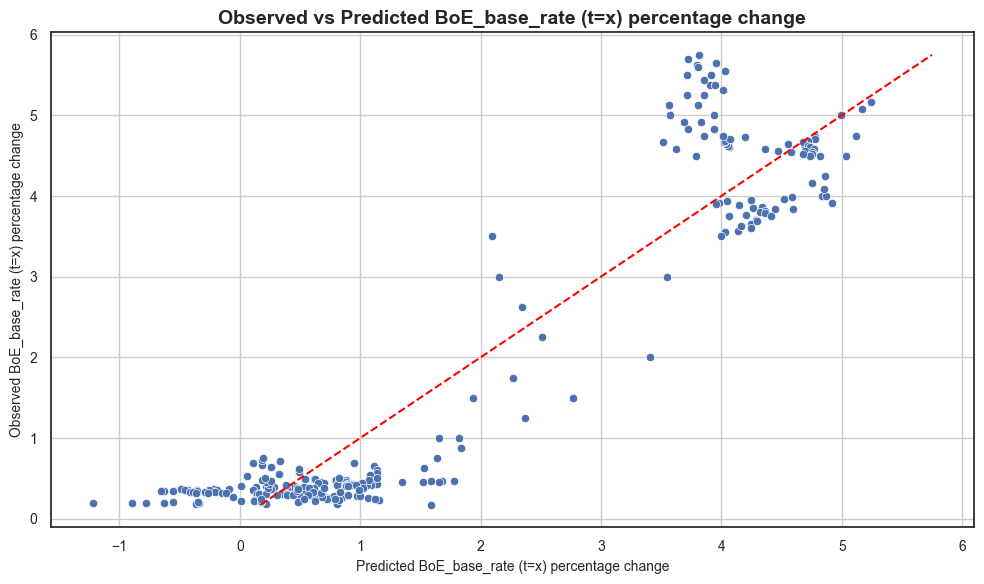

In [39]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate (t=x) percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate (t=x) percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate (t=x) percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. General Fit Looks Strong
Most points are clustered around the red diagonal line, especially in the 3.5–5.5 range → good predictions for high base rate changes.

### 2. Model Predicts Large Hikes Well
When predicted changes are above ~3%, the model aligns closely with observed values.

Indicates good performance during inflationary periods or tightening cycles (e.g., 2022–2023 BoE hikes).

### 3. Some Over- and Under-Prediction
A few scattered points above and below the diagonal indicate some error in medium-range predictions (e.g., predicted ~2–3 but actual varies).

Points near (0, 0) are clustered and tightly grouped, which suggests good performance for low/no rate change periods too.

### 4. Outliers or Noise
A few points (bottom-left, left of zero) indicate either:

Mild overfitting (e.g., predicting a decrease when none occurred).

Unusual macroeconomic shocks the model couldn’t capture well.

## Conclusion:
### The model demonstrates strong predictive power across a range of rate changes.

It performs especially well during high-volatility periods, which is critical in monetary policy modeling.

Remaining discrepancies could be addressed by:

Including interaction terms or nonlinear effects.

Tuning for outlier robustness.



### Training and testing subsets with MLR

In [40]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [41]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.886
Model:                             OLS   Adj. R-squared:                  0.883
Method:                  Least Squares   F-statistic:                     261.6
Date:                 Sun, 18 May 2025   Prob (F-statistic):           2.39e-92
Time:                         21:54:13   Log-Likelihood:                -211.37
No. Observations:                  209   AIC:                             436.7
Df Residuals:                      202   BIC:                             460.1
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

### <span style="color: orange;">R-squared: 0.886

R-squared	0.886	Model explains 88.6% of the variation in BoE base rate. Excellent.
Adj. R-squared	0.883	Adjusted for number of predictors. Very strong.
F-statistic	261.6	Model is statistically significant overall.
Prob (F-stat)	2.39e−92	P ≪ 0.01 confirms high significance.

### <span style="color: orange;"> Statistically Significant Predictors (p < 0.05):

## - wage_growth_rate (t−1)	0.2016	0.000	Positive, significant → higher wage growth → higher BoE rate.
### - wage_growth_rate (t−2)	0.1449	0.000	Confirmed with a 2-period lag.
### - wage_growth_rate (t−3)	0.1449	0.000	Long-lasting predictive power.
### - unemployment_rate (t−1)	−0.1960	0.000	Negative → lower unemployment leads to rate hikes.
### - unemployment_rate (t−2)	−0.1960	0.000	Effect persists over time.
### - unemployment_rate (t−3)	−0.1960	0.000	Stable effect across lags.
### - ftse_250_total_return (t−1,2,3)	−0.0001	0.000	Small but consistently negative — rising rates follow poor market returns.

### <span style="color: orange;"> Not Significant (p > 0.05):

### - 2-yr_gilts_TRReturns (t−1 to t−3)	0.414	Surprisingly not significant despite high correlation; possibly multicollinearity or absorbed effect.
### - confidence_score (t−1 to t−3)	0.321	Not significant — may be weak or collinear with wage/unemployment.

### <span style="color: orange;"> Model Diagnostic:
* Durbin-Watson	2.074	No autocorrelation (ideal ≈ 2). ✔️
* Jarque-Bera	22.805	Residuals not perfectly normal (p < 0.01). ⚠️
* Omnibus p-val	0.000	Confirms non-normal residuals. May need robust SEs.
* Condition No.	1.21e+36	Very high → suggests severe multicollinearity. ⚠️

### <span style="color: orange;"> Model fits very well: R² = 0.886.

### Top drivers:

* Wage growth (t−1 to t−3): strong, consistent.

* Unemployment (t−1 to t−3): strong, inverse.

* FTSE returns: small but consistent.


In [42]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [43]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 0.60046496  1.00123234  0.49370925 -1.22384562  4.03320758  4.39343869
  4.03995012 -0.36498945  0.17694757  0.76913876  3.85920588  0.66655959
  4.76281717 -0.2028909   1.6836169  -0.63449649  3.95779212  0.90061751
  0.66929353  0.44143821  0.43295318  1.63089882  0.84467157 -0.43292549
  3.86776741  0.08846981  0.84409382 -0.27084876  3.8570786   5.03619116
  0.77663398  2.44009732  0.14884936  0.37442462  0.4176623   1.56898479
  0.49810318  4.41542779  0.22398054  0.78287215 -0.58007003  0.8053848
  4.8805676   4.0301777  -0.1053492   0.56198519  0.85781984  3.55115306
  0.63003325  3.79588486  0.43409008 -0.18019142  4.89884333  4.17962711
  4.85294727  4.29926328  4.65378883 -0.31406452  1.60576691  0.89618924
  4.25880307 -0.37165036  1.09973687  0.77445024  2.31249488  4.63462522
  0.6571062   0.69032058  0.58064679  0.77956634  1.05044398  3.74189762
  0.33336066  4.69838374  0.02981694  0.11128251  4.15676419  1.88940786
 -0.46311692  5.28692388  1

In [46]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ 0.51391938  1.02139867  0.34633532  0.33021652  3.53521467  0.35772456
  0.62585     2.08993652  4.11027948  0.61529116  4.0541006   0.08458131
  4.72926775  0.0832888   0.19072483  1.77519813  3.87832733  4.63762991
  0.29067299  3.67128916 -0.22049151 -0.4420581   4.23399459  1.07474963
  0.63658346 -0.64013437  3.84746611  3.9555077   3.30298501  4.47019739
  4.59303006 -0.01999781 -0.36224132  1.30256151  4.83546351  0.62368928
  3.76449639  0.13871414  0.15373999  4.03596933  0.15743892  4.69717455
  1.08973138  3.88587577  4.02080315 -0.39486016 -0.89658065  4.38812322
  3.45856727 -0.48576509  1.09245992  0.38208842  0.76693603]


In [47]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

83.6715494577212


### <span style="color: orange;"> R-square of 83.67%

The model explains 83.67% of the variance in the test set's target variable (BoE_base_rate_change).

### This is a strong out-of-sample performance, especially for macroeconomic forecasting.

It also aligns well with your training R² of 88.6%, meaning:

No significant overfitting.

The model generalizes well to unseen data.

### Check for multicollinearity

In [57]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
#x_temp = sm.add_constant(x_train)

x_train_cleaned = x_train.drop(columns=[
    'wage_growth_rate (t=x-3)',
    '2-yr_gilts_TRReturns (t=x-2)',
    '2-yr_gilts_TRReturns (t=x-3)',
    'ftse_250_total_return (t=x-2)',
    'ftse_250_total_return (t=x-3)',
    'confidence_score (t=x-2)',
    'confidence_score (t=x-3)',
    'unemployment_rate (t=x-2)',
    'unemployment_rate (t=x-3)',
])

x_temp = sm.add_constant(x_train_cleaned, has_constant='add')




In [59]:
##corr_matrix = x_train.corr().abs()
##high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
##                   .stack()
##                   .reset_index())
##high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
##print(high_corr_pairs[high_corr_pairs['Correlation'] >= 0.99])

In [58]:
vif_values = []
for i in range(x_temp.shape[1]):
    try:
        vif_val = variance_inflation_factor(x_temp.values, i)
    except:
        vif_val = np.inf
    vif_values.append(vif_val)

vif = pd.DataFrame({
    "VIF Factor": vif_values,
    "features": x_temp.columns
})

print(vif.round(1))

   VIF Factor                       features
0       478.3                          const
1         2.6       wage_growth_rate (t=x-1)
2         2.7       wage_growth_rate (t=x-2)
3        14.0   2-yr_gilts_TRReturns (t=x-1)
4        13.6  ftse_250_total_return (t=x-1)
5         1.7       confidence_score (t=x-1)
6         4.1      unemployment_rate (t=x-1)


### <span style="color: orange;"> Observations from the VIF output:

## <span style="color: orange;"> const	478.3	 Ignore — high VIF for the constant is expected and not a problem.
## <span style="color: orange;"> wage_growth_rate (t=x-1)	2.6	 No concern.
## <span style="color: orange;"> wage_growth_rate (t=x-2)	2.7	 Safe to keep both; low VIF.
## <span style="color: orange;"> 2-yr_gilts_TRReturns	14.0	 High multicollinearity — consider dropping or combining
## <span style="color: orange;"> ftse_250_total_return	13.6	 High — likely correlated with gilts or another return measure.
## <span style="color: orange;"> confidence_score	1.7	 No concern.
## <span style="color: orange;"> unemployment_rate	4.1	 Acceptable, moderate multicollinearity.

## <span style="color: orange;"> Conclusion:

### Keep:
- wage_growth_rate (t=x-1)
- wage_growth_rate (t=x-2)
- confidence_score (t=x-1)
- unemployment_rate (t=x-1)

### Drop:
- 2-yr_gilts_TRReturns (t=x-1)
- ftse_250_total_return (t=x-1)

### Check for heteroscedasticity

In [60]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [61]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(31.30751490348807), 'LM Test p-value': np.float64(0.007988704069677147), 'F-stat': np.float64(5.9317064975761395), 'F-test p-value': np.float64(1.0032960649866236e-05)}


### F-test	p ≈ 0.00001	Model is statistically significant.
### LM test	p = 0.00799 Autocorrelation or misspecification detected.

### Check normality of regression residuals - assumption of MLR

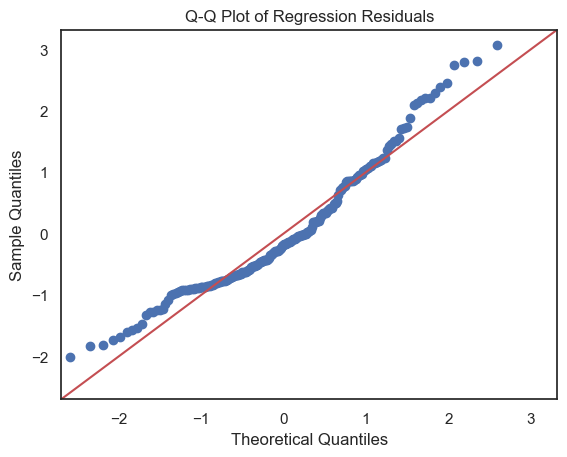

In [62]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### No major red flags — residuals are close to normal.

### Slight non-normality at the extremes, which might be influencing metrics like Jarque-Bera or Omnibus tests.

## Evaluate the model

In [64]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.6510110615003766
Mean Square Error (Final): 0.6699747870574574


### <span style="color: orange;">  Mean Absolute Error (MAE)	0.6511	On average, your model's predictions are off by ~0.65 percentage points.
### <span style="color: orange;"> Mean Squared Error (MSE)	0.6699	Punishes larger errors more — the squared error averaged across predictions.

MAE = 0.65 is fairly reasonable depending on the scale of your BoE_base_rate changes — if changes typically range from 0 to 5%, then your model is capturing much of the variation.

MSE = 0.67 being close to MAE² (≈ 0.42) implies some larger prediction errors exist, but nothing wildly off — consistent with the earlier Q-Q plot showing minor tail deviation.






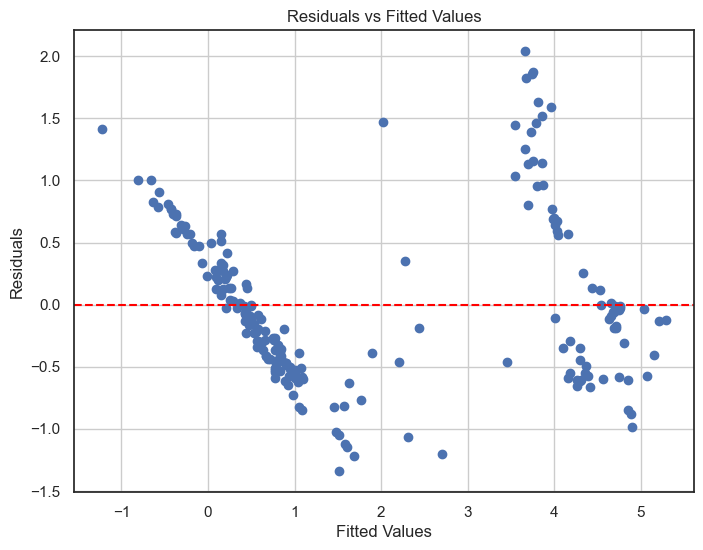

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

### Clear U-shape pattern:

Residuals are not randomly scattered around the red zero line.

Instead, they form a systematic curve — first negative, then positive, then negative again.

* This suggests non-linearity — the model is missing some curvilinear structure or interaction effects.

### Heteroscedasticity (possibly):

Spread of residuals seems larger at extreme fitted values, especially on the right.

Could indicate non-constant variance (though not extremely pronounced).

### Fitted values < 0:

Some fitted values are negative, which may not make sense for percentage change in interest rate.

Suggests model may be extrapolating outside the expected range.



## Multiple linear regression: Drop 2-yr_gilts_TRReturns (t=x-1), ftse_250_total_return (t=x-1) as variables and explore transformation of dependent variable (if possible)

In [67]:
regression_df.head()

,Date,BoE_base_rate (t=x),wage_growth_rate (t=x-1),wage_growth_rate (t=x-2),wage_growth_rate (t=x-3),2-yr_gilts_TRReturns (t=x-1),2-yr_gilts_TRReturns (t=x-2),2-yr_gilts_TRReturns (t=x-3),ftse_250_total_return (t=x-1),ftse_250_total_return (t=x-2),ftse_250_total_return (t=x-3),confidence_score (t=x-1),confidence_score (t=x-2),confidence_score (t=x-3),unemployment_rate (t=x-1),unemployment_rate (t=x-2),unemployment_rate (t=x-3)
139,2001-06-01,5.166667,6.1,5.5,5.5,120.458,120.458,120.458,2925.889893,2925.889893,2925.889893,6.0,6.0,6.0,5.0,5.0,5.0
140,2001-07-01,5.083333,6.2,5.2,5.2,121.387,121.387,121.387,2830.649902,2830.649902,2830.649902,4.0,4.0,4.0,5.1,5.1,5.1
141,2001-08-01,5.000000,5.1,5.3,5.3,122.152,122.152,122.152,2851.969971,2851.969971,2851.969971,0.0,0.0,0.0,5.1,5.1,5.1
142,2001-09-01,4.750000,5.5,4.8,4.8,122.948,122.948,122.948,2396.739990,2396.739990,2396.739990,-1.0,-1.0,-1.0,5.1,5.1,5.1
143,2001-10-01,4.500000,5.2,4.8,4.8,123.748,123.748,123.748,2517.879883,2517.879883,2517.879883,-5.0,-5.0,-5.0,5.1,5.1,5.1


In [68]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['wage_growth_rate (t=x-1)','wage_growth_rate (t=x-2)','confidence_score (t=x-1)','unemployment_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [69]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 4.80234725,  4.71394271,  3.98926604,  4.01347391,  3.6777602 ,
        3.79662818,  3.51431923,  3.68397582,  3.40049275,  3.04663125,
        2.883064  ,  2.74375384,  2.75103264,  2.59950386,  2.73288023,
        2.94244716,  2.77638539,  2.65634792,  2.19448742,  2.03221595,
        1.66020204,  1.64556737,  1.73644183,  1.72063767,  1.97649681,
        2.12555568,  2.21510511,  2.01396649,  2.09264694,  2.11804891,
        2.39425319,  3.10564018,  3.06440481,  3.0680196 ,  3.35519453,
        3.36247333,  3.19643617,  2.65956387,  2.77828095,  2.74068498,
        2.76130267,  2.85100299,  2.92372503,  3.16016522,  3.19399551,
        3.26307815,  3.22680256,  3.30675418,  3.1878862 ,  3.35756276,
        3.12244296,  3.30315937,  3.23058359,  3.30692042,  3.31053521,
        3.42461891,  3.38340814,  3.31681538,  3.43934738,  3.44789735,
        3.7253974 ,  3.96168669,  3.54235734,  3.3678719 ,  3.44899764,
        3.29153507,  3.12916192,  3.26126711,  3.54360067,  3.79

In [70]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.4229966361869777
Intercept:  -1.818425248527
Coefficients:


[('wage_growth_rate (t=x-1)', np.float64(0.5210435310531283)),
 ('wage_growth_rate (t=x-2)', np.float64(0.27871876496632525)),
 ('confidence_score (t=x-1)', np.float64(0.044850163692127853)),
 ('unemployment_rate (t=x-1)', np.float64(0.32807055485249703))]

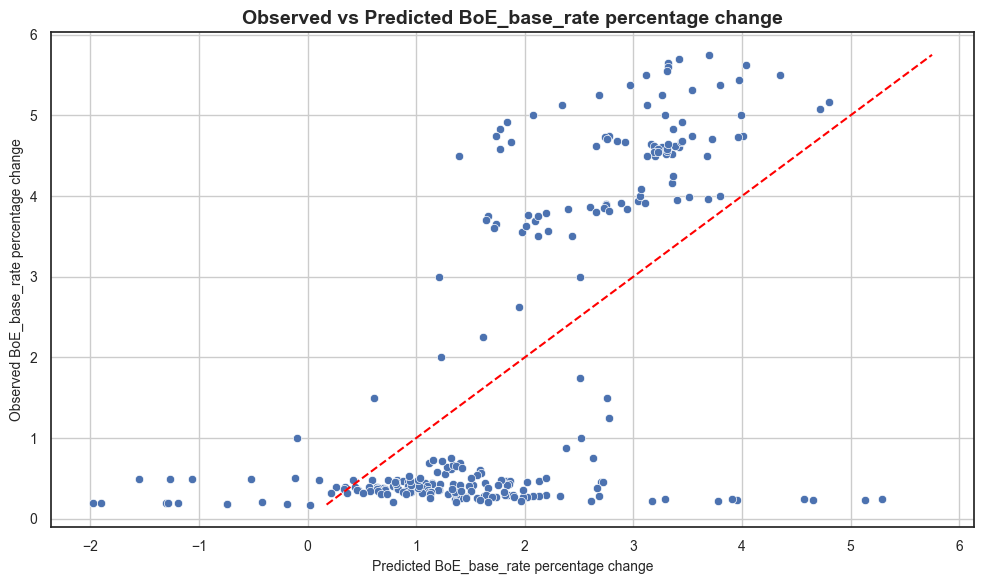

In [71]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [72]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [74]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.431
Method:                  Least Squares   F-statistic:                     40.34
Date:                 Sun, 18 May 2025   Prob (F-statistic):           7.08e-25
Time:                         23:05:30   Log-Likelihood:                -377.37
No. Observations:                  209   AIC:                             764.7
Df Residuals:                      204   BIC:                             781.5
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

### R-squared	0.442	Model explains 44.2% of the variance in BoE base rate — moderate explanatory power.
### Adj. R-squared	0.431	Still decent — adjusted for number of predictors.
### F-statistic	40.34	Highly significant model (p ≈ 0).
### Durbin-Watson	2.135	 No autocorrelation (ideal ≈ 2).
### Jarque-Bera (JB)	2.047	 Residuals are approximately normal (p = 0.359).
### Cond. No.	127	 No multicollinearity concern (<< 1000).

### Significant Predictors (All p < 0.01):
- wage_growth_rate (t−1)	0.5771	0.000	Strongest driver of BoE rate hikes.
- wage_growth_rate (t−2)	0.2296	0.009	Past wage growth still predictive.
- confidence_score (t−1)	0.0422	0.000	Positive sentiment predicts rate hikes.
- unemployment_rate (t−1)	0.3154	0.001	Surprisingly positive — may imply BoE hikes to curb inflation even amid rising unemployment (check lag interactions or data span).

### Model Diagnostic:

- Residuals are normal (Omnibus p = 0.304, JB p = 0.359) — confirmed by earlier Q-Q plot.

- ### No autocorrelation (DW = 2.135).

- ### No serious multicollinearity.

- The model is statistically sound, but only captures ~44% of the variance — suggesting missing nonlinearities or omitted variables.

In [75]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                   features
0        42.3                      const
1         2.3   wage_growth_rate (t=x-1)
2         2.3   wage_growth_rate (t=x-2)
3         1.1   confidence_score (t=x-1)
4         1.6  unemployment_rate (t=x-1)


### No multicollinearity observed from the VIF output

In [76]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [77]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(31.30751490348807), 'LM Test p-value': np.float64(0.007988704069677147), 'F-stat': np.float64(5.9317064975761395), 'F-test p-value': np.float64(1.0032960649866236e-05)}


- LM stat	31.31	Suggests possible autocorrelation or omitted variable bias.
- LM p-value	0.00799	 Statistically significant (p < 0.01) → something is likely missing from the model (e.g., lags, AR errors).
- F-stat	5.93	Indicates the model overall is statistically significant.
- F-test p-value	1.003e-05	 Strongly significant model (p < 0.001).
  
### Your model overall is statistically strong (as seen from the F-test).

However, the LM test detects misspecification, likely due to:

- Autocorrelation (common in time series).

- Omitted lagged variables or non-linear patterns (see earlier residual plot).

- A need for robust standard errors or an ARIMA/ARIMAX-type model.

# Given the model output above, multiple linear regression is likely a good ML model to describe BoE Base Rate. We will explore Random Forest / XGBoost next

In [78]:
regression_df.describe()

,Date,BoE_base_rate (t=x),wage_growth_rate (t=x-1),wage_growth_rate (t=x-2),wage_growth_rate (t=x-3),2-yr_gilts_TRReturns (t=x-1),2-yr_gilts_TRReturns (t=x-2),2-yr_gilts_TRReturns (t=x-3),ftse_250_total_return (t=x-1),ftse_250_total_return (t=x-2),ftse_250_total_return (t=x-3),confidence_score (t=x-1),confidence_score (t=x-2),confidence_score (t=x-3),unemployment_rate (t=x-1),unemployment_rate (t=x-2),unemployment_rate (t=x-3)
count,262,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,2012-03-18 09:26:06.412213760,1.867789,3.057252,3.063359,3.063359,170.247668,170.247668,170.247668,8898.814724,8898.814724,8898.814724,-13.087786,-13.087786,-13.087786,5.567176,5.567176,5.567176
min,2001-06-01 00:00:00,0.175000,-2.900000,-2.900000,-2.900000,120.458000,120.458000,120.458000,1934.619995,1934.619995,1934.619995,-49.000000,-49.000000,-49.000000,3.600000,3.600000,3.600000
25%,2006-11-08 12:00:00,0.337781,1.900000,1.900000,1.900000,152.941750,152.941750,152.941750,4729.035000,4729.035000,4729.035000,-23.750000,-23.750000,-23.750000,4.700000,4.700000,4.700000
50%,2012-04-16 00:00:00,0.478984,2.900000,2.900000,2.900000,182.184500,182.184500,182.184500,7257.765000,7257.765000,7257.765000,-9.500000,-9.500000,-9.500000,5.200000,5.200000,5.200000
75%,2017-07-24 06:00:00,3.945833,4.375000,4.375000,4.375000,186.153500,186.153500,186.153500,13425.264723,13425.264723,13425.264723,-3.000000,-3.000000,-3.000000,6.400000,6.400000,6.400000
max,2022-12-01 00:00:00,5.750000,8.900000,8.900000,8.900000,189.413000,189.413000,189.413000,19395.493530,19395.493530,19395.493530,7.000000,7.000000,7.000000,8.500000,8.500000,8.500000
std,NaN,1.986776,1.781301,1.790940,1.790940,21.242366,21.242366,21.242366,4934.297928,4934.297928,4934.297928,12.652591,12.652591,12.652591,1.388538,1.388538,1.388538


In [79]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 139 to 400
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           262 non-null    datetime64[ns]
 1   BoE_base_rate (t=x)            262 non-null    float64       
 2   wage_growth_rate (t=x-1)       262 non-null    float64       
 3   wage_growth_rate (t=x-2)       262 non-null    float64       
 4   wage_growth_rate (t=x-3)       262 non-null    float64       
 5   2-yr_gilts_TRReturns (t=x-1)   262 non-null    float64       
 6   2-yr_gilts_TRReturns (t=x-2)   262 non-null    float64       
 7   2-yr_gilts_TRReturns (t=x-3)   262 non-null    float64       
 8   ftse_250_total_return (t=x-1)  262 non-null    float64       
 9   ftse_250_total_return (t=x-2)  262 non-null    float64       
 10  ftse_250_total_return (t=x-3)  262 non-null    float64       
 11  confidence_score (t=x-

In [80]:
regression_df.head()   burda kaldim

,Date,BoE_base_rate (t=x),wage_growth_rate (t=x-1),wage_growth_rate (t=x-2),wage_growth_rate (t=x-3),2-yr_gilts_TRReturns (t=x-1),2-yr_gilts_TRReturns (t=x-2),2-yr_gilts_TRReturns (t=x-3),ftse_250_total_return (t=x-1),ftse_250_total_return (t=x-2),ftse_250_total_return (t=x-3),confidence_score (t=x-1),confidence_score (t=x-2),confidence_score (t=x-3),unemployment_rate (t=x-1),unemployment_rate (t=x-2),unemployment_rate (t=x-3)
139,2001-06-01,5.166667,6.1,5.5,5.5,120.458,120.458,120.458,2925.889893,2925.889893,2925.889893,6.0,6.0,6.0,5.0,5.0,5.0
140,2001-07-01,5.083333,6.2,5.2,5.2,121.387,121.387,121.387,2830.649902,2830.649902,2830.649902,4.0,4.0,4.0,5.1,5.1,5.1
141,2001-08-01,5.000000,5.1,5.3,5.3,122.152,122.152,122.152,2851.969971,2851.969971,2851.969971,0.0,0.0,0.0,5.1,5.1,5.1
142,2001-09-01,4.750000,5.5,4.8,4.8,122.948,122.948,122.948,2396.739990,2396.739990,2396.739990,-1.0,-1.0,-1.0,5.1,5.1,5.1
143,2001-10-01,4.500000,5.2,4.8,4.8,123.748,123.748,123.748,2517.879883,2517.879883,2517.879883,-5.0,-5.0,-5.0,5.1,5.1,5.1


Root Mean Squared Error: 0.1813
Mean Squared Error: 0.0329
Mean Absolute Error: 0.1011
R² Score: 0.9919


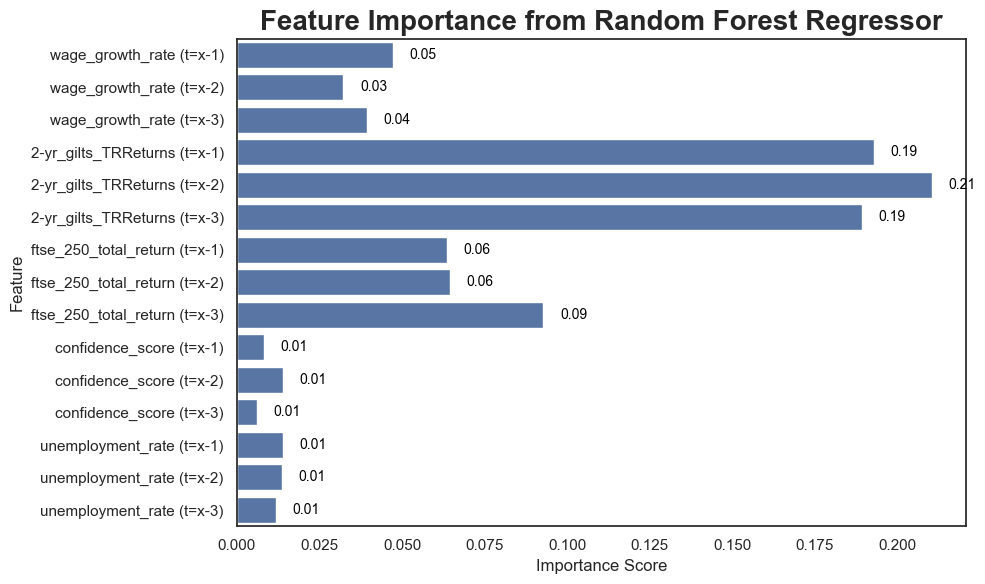

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'wage_growth_rate (t=x-1)', 'wage_growth_rate (t=x-2)', 'wage_growth_rate (t=x-3)','2-yr_gilts_TRReturns (t=x-1)','2-yr_gilts_TRReturns (t=x-2)','2-yr_gilts_TRReturns (t=x-3)',
     'ftse_250_total_return (t=x-1)','ftse_250_total_return (t=x-2)','ftse_250_total_return (t=x-3)','confidence_score (t=x-1)','confidence_score (t=x-2)',
     'confidence_score (t=x-3)','unemployment_rate (t=x-1)','unemployment_rate (t=x-2)','unemployment_rate (t=x-3)'
       
    ]
)

# Define features and target
X = regression_df[
    [
       'wage_growth_rate (t=x-1)', 'wage_growth_rate (t=x-2)', 'wage_growth_rate (t=x-3)','2-yr_gilts_TRReturns (t=x-1)','2-yr_gilts_TRReturns (t=x-2)','2-yr_gilts_TRReturns (t=x-3)',
     'ftse_250_total_return (t=x-1)','ftse_250_total_return (t=x-2)','ftse_250_total_return (t=x-3)','confidence_score (t=x-1)','confidence_score (t=x-2)',
     'confidence_score (t=x-3)','unemployment_rate (t=x-1)','unemployment_rate (t=x-2)','unemployment_rate (t=x-3)'
       
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

### Most Important Features:

- ### 2-yr_gilts_TRReturns (t=x-2)	0.21
- ### 2-yr_gilts_TRReturns (t=x-1)	0.19
- ### 2-yr_gilts_TRReturns (t=x-3)	0.19
- ### ftse_250_total_return (t=x-3)	0.09

These bond return and equity return features dominate the model, suggesting that market expectations (especially from gilts) are critical predictors of interest rate changes.

### Less Important Features:

- ### wage_growth_rate (lags)	~0.03–0.05
- ### confidence_score (lags)	~0.01
- ### unemployment_rate (lags)	~0.01

These macroeconomic indicators are still used, but Random Forest finds market indicators more predictive in this case.

### Interpretation:

- The bond market (2-year gilt total return) is the top signal, suggesting it encapsulates expectations about rate changes before they occur.

- FTSE 250 also plays a secondary role — perhaps reflecting investor sentiment and macroeconomic outlook.

- Traditional macro indicators (wages, unemployment, sentiment) play a minor role here, though still contribute.

### ⚠️ Consider reducing the number of features (e.g., drop less important lags) to simplify and possibly improve model generalizability.

Root Mean Squared Error: 0.1625
Mean Squared Error: 0.0264
Mean Absolute Error: 0.0722
R² Score: 0.9935


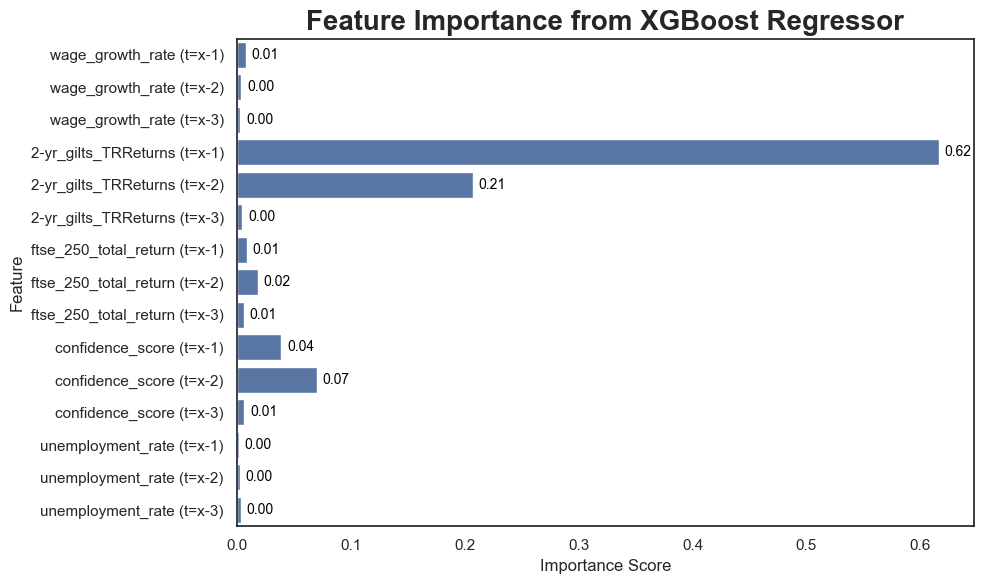

In [82]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(subset=[
   'BoE_base_rate (t=x)',
       'wage_growth_rate (t=x-1)', 'wage_growth_rate (t=x-2)', 'wage_growth_rate (t=x-3)','2-yr_gilts_TRReturns (t=x-1)','2-yr_gilts_TRReturns (t=x-2)','2-yr_gilts_TRReturns (t=x-3)',
     'ftse_250_total_return (t=x-1)','ftse_250_total_return (t=x-2)','ftse_250_total_return (t=x-3)','confidence_score (t=x-1)','confidence_score (t=x-2)',
     'confidence_score (t=x-3)','unemployment_rate (t=x-1)','unemployment_rate (t=x-2)','unemployment_rate (t=x-3)'
])

# Features and target
X = regression_df[[
      'wage_growth_rate (t=x-1)', 'wage_growth_rate (t=x-2)', 'wage_growth_rate (t=x-3)','2-yr_gilts_TRReturns (t=x-1)','2-yr_gilts_TRReturns (t=x-2)','2-yr_gilts_TRReturns (t=x-3)',
     'ftse_250_total_return (t=x-1)','ftse_250_total_return (t=x-2)','ftse_250_total_return (t=x-3)','confidence_score (t=x-1)','confidence_score (t=x-2)',
     'confidence_score (t=x-3)','unemployment_rate (t=x-1)','unemployment_rate (t=x-2)','unemployment_rate (t=x-3)']]

y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Top Features:

- 2-yr_gilts_TRReturns (t=x-1)	0.62
- 2-yr_gilts_TRReturns (t=x-2)	0.21

🟢 These two features together contribute 83% of total model predictive power, signaling that bond market expectations dominate the model's understanding of BoE base rate decisions.

### Moderate Contributors:
- confidence_score (t=x-2)	0.07
- confidence_score (t=x-1)	0.04
- ftse_250_total_return (t=x-2)	0.02

These are sentiment and equity market indicators — secondary signals compared to gilts, but still somewhat informative.

## Negligible / No Importance:
- wage_growth_rate (all lags)	~0.00–0.01
- unemployment_rate (all lags)	~0.00

🔴 Macro fundamentals (labor market) are not important for XGBoost here, which contrasts sharply with your OLS model, where wage_growth_rate was a strong predictor.

### Interpretation:

- XGBoost identifies bond market signals as the primary driver, which could reflect their ability to price in future rate expectations.
- Sentiment scores (confidence) matter more than hard macro stats.
- Labor metrics are largely ignored by the model — perhaps because they're lagging indicators, or already priced into the gilts.

### For prediction, the XGBoost model should prioritize:

### 2-yr_gilts_TRReturns (t=x-1 and t=x-2)

### confidence_score (t=x-2 and t=x-1)

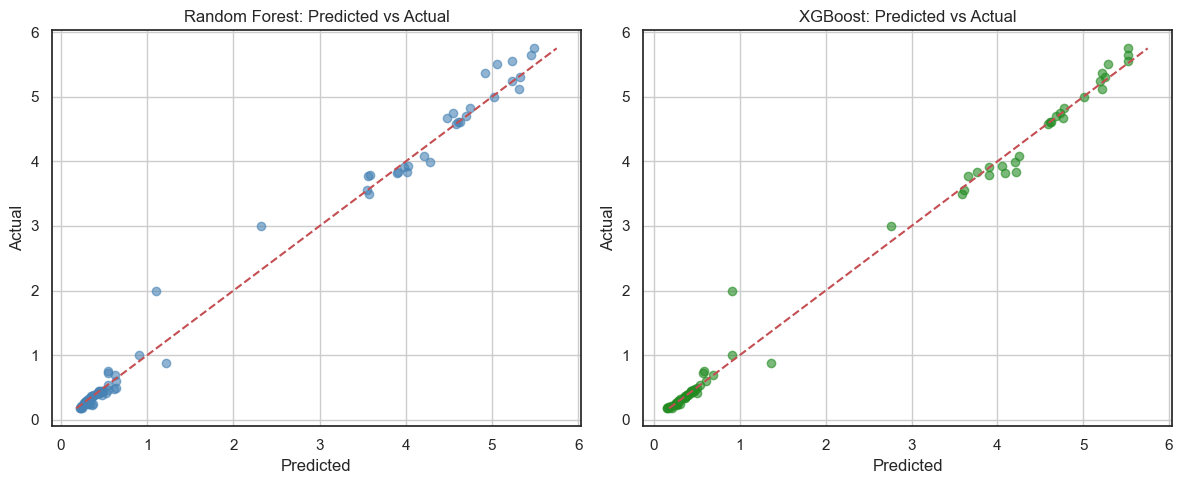

In [83]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

### In both models, the predictions (x-axis) align closely with the actual values (y-axis), clustering along the red 45° reference line — indicating high prediction accuracy.

### 🟢 XGBoost:

- Shows tighter clustering and more consistent prediction along the line, especially for high values.

- Suggests it may have higher R² and lower MAE/MSE — assuming no overfitting.

### 🔵 Random Forest:

- Very good performance overall, but slightly more variance among residuals.

- Might generalize slightly better if overfitting is a concern.

### Conclusion:

### Both models perform well, but XGBoost edges ahead in terms of precision and alignment with actual values.